# Add-ons to the matrix embedding model (model 4)

## Results 

## 1. With Layer Norm

MSE acheieved:  2.9252 (increased from 2.876)

The decrease is not too conspicuous whereas the model does better with assays that have low variability 

#### Sample result 

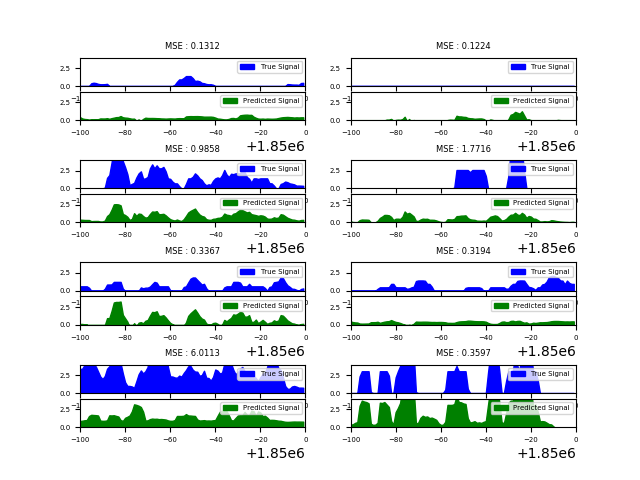

## 2. Z-normed assays w/o Layer Norm

MSE acheieved:  3.397

#### Sample result 

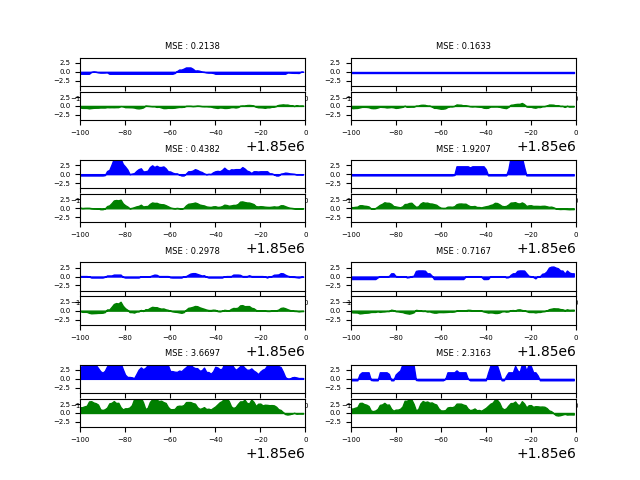

## 3. Layer Norm with Z-normed assays 

MSE acheieved:  3.484

#### Sample result 

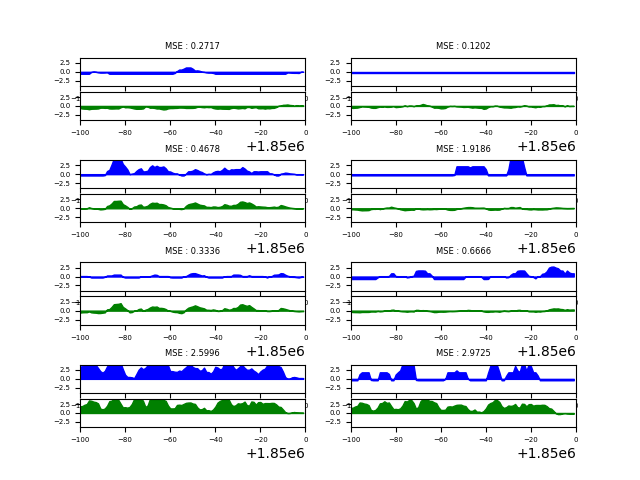

## 4. Bidirectional LSTM w/o z-norm w/o LN

### Run 1

hidden nodes = 3 * 3 = 6

MSE acheieved: 1.5544

#### Sample result 

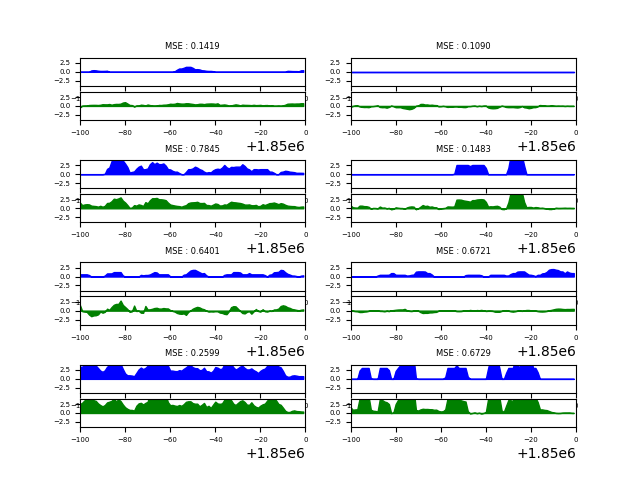

### Run 2

hidden nodes = 2 * 2 = 4

MSE acheieved: 2.051

#### Sample result 

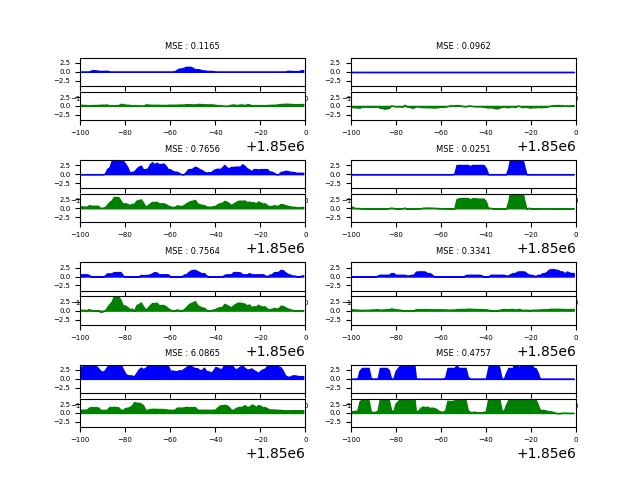

## 5. model 4 with h4 

MSE acheieved: 1.984

#### Sample result 

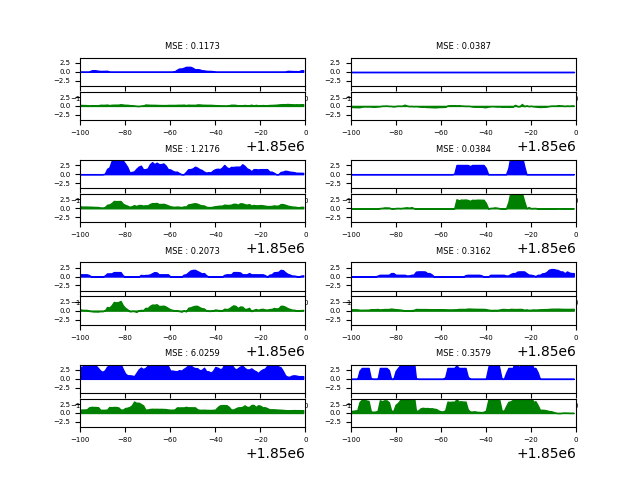

## Downstream Analysis 

### RNA-Seq Prediction 
Features from the entire window are chosen and RNA expression value > 0.5 is labeled as 1 for each cell type.

**MAP With balanced classes (undersampling)**:

1. _number of hidden states_ = 2: 0.58
2. _number of hidden states_ = 3: 0.60
3. _number of hidden states_ = 4: 0.62
4. _number of hidden states_ = 6: 0.63
5. _number of hidden states_ = 8: 0.65

Avocado MAP is consistently between 0.6 and 0.8 for 75% of the cell types and better than our results.  

It is observed that increasing the number of hidden states increases the MAP gradually, however, it is worth noting that when the number of hidden states are 2,3,4, effectively only 2 hidden states are used while the others are nearly turned off (set to a very small value). While when the number of hidden states is 6, all the hidden states are used.  

This prompts us to set the number of hidden states to 6. 

### PE-Interaction
Only features from the window are chosen for now (combining features from all the three regions, namely, Promoter, Enhancer and Window might result in better performance) 

**MAP With balanced classes (oversampling)**: 0.96 

Avocado MAP maxes out at 0.8. 

### FIRE
Features from the entire window are chosen and FIRE value > 0.5 is labeled as 1 for each cell type.

**MAP With balanced classes (undersampling)**:

1. GM12878: 0.712
2. H1 = 0.716 

Avocado MAP maxes out at 0.6.

### TAD
Features from entire window are chosen and negative labels are created in the opposing direction of the actual window.

**MAP** (no need of balancing):

1. GM12878: 0.535 
2. H1 : 0.533

Avocado MAP maxes out at 0.1.

## Observations

1. The model is performing worse with Z-normed assays when compared to assays that are not z-normed (MSE increases from 2.876 to 3.397). Not sure why this is happening but could be related gradient flow. Have to check optimizer functions like gradient clipping and zero grad. Part of the reason could be beacuse the z-normed assays are more difficult to learn for the lstm as negative values are more frequent therefore needing sharper gradient changes. But maybe not important?  

2. The model with layer norm is performing slightly worse than the regular model (model 4). MSE increases from 2.876 to 2.925). But because of layer normalization the bias of the model towards particular assays decreases.   

3. Bidirectional LSTM does not show improvement over regular LSTM when used with similar number of hidden states (4).

4. For now, the choice is to stick with unidirectional LSTM without using z-normed assays. Layer norm can be optional and could be experimented with downstream tasks. 

### Downstream
1. Some of the features are consistently zero for all positions when _number of hidden states_ = 2,3,4. Hoever, when _number of hidden states_ = 6, it is observed that all the hidden states are used completely and none of them are set consistently to zero. The reason for this is hard to pinpoint. 

2. **RNA-Seq** MAP values are not as good as the MAP values obtained from the Avocado latent factors. This could be because of:
    1. Reduced number of features. (Avocado uses atleast 25 features per genomic position). This hypothesis is proved when the MAP improves with increase in number of hidden states. Too many features may not be necessary for autoencoding, howeevr, they may be required to effectively separate the class spaces in high diomensions. 
  
3. On the contrary, PE-Interactions, Frequently Interacting Regions (FIREs) and Topologically Associated Domains (TADs) perform better than the Avocado baseline. 

4. Currently for classification, each position is considered separatelty for training. It might be useful to combine features from say the whole gene (may be concat the features obtained from our model and project them to a lower dimension?) and use this as one of the points for classification? This might improve RNA-Seq performance. 

5. A similar approach as mentioned above can also be used to combine features from promoter, enhancer and window as well as the FIREs and TADs. 


### Next week 

### Meeting